In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

In [15]:
# 시계열 데이터 y = 0.5sin(x)-cos(x/2) 정의
# 1000개의 시계열 데이터
x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

# RNN 입력에 필수적인(batch size, time steps, imput_dim) 3차원 텐서 형태의 입력 데이터로 쉽게 만들기 위해서
# reshape(-1, 1) 사용하여 (1000, 1) 행렬로 바꾸어줌
seq_data = y.reshape(-1, 1)

print(seq_data.shape)
print(seq_data[:10])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]
 [-0.54817693]
 [-0.48931695]
 [-0.44664785]
 [-0.42127419]
 [-0.41352329]]


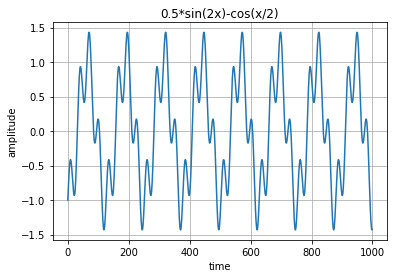

In [16]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [33]:
def seq2dataset(seq, window, horizon):

    X = [] # 입력 데이터를 저장하는 list
    Y = [] # 정답 데이터를 저장하는 list

    for i in range(len(seq)-(window+horizon)+1):

        x = seq[i:(i+window)] # 슬라이싱을 이용하여 [[...], [...], ...] 형상으로 x 데이터를 생성함
        y = (seq[i+window+horizon-1])

        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y) # x.shape = [[...], [...], ...] 은 2차원 행렬인데,
                # np.array(X)를 통해서 (batch size, time steps, imput dims) 형상을 가지능 3차원 텐서로 변환되어 리턴됨

In [34]:
# 입력 데이터 X, 정답 데이터 Y 생성
w = 20 # window size
h = 1 # horizon factor

X, Y = seq2dataset(seq_data, w, h)
# 시계열 데이터 seq_data로 부터 window size w, horizen factor h에 맞게 RNN 입력데이터 X, 정답 데이터 Y 생성함.
# 이때 리턴되는 입력 데이터 X.shape = (batch size, time steps, imput dims)
print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [36]:
# 트레이닝 테이터 / 테스트 데이터 분리
split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(784, 20, 1) (784, 1)
(196, 20, 1) (196, 1)


In [37]:
# SimpleRNN 모델 구축
model = Sequential()

model.add(SimpleRNN(units=128, activation='tanh', input_shape=x_train[0].shape))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25/25 [==============================] - 3s 48ms/step - loss: 0.0692 - mae: 0.1660 - val_loss: 0.0084 - val_mae: 0.0782
Epoch 2/100
25/25 [==============================] - 1s 38ms/step - loss: 0.0034 - mae: 0.0455 - val_loss: 0.0017 - val_mae: 0.0344
Epoch 3/100
25/25 [==============================] - 1s 40ms/step - loss: 0.0011 - mae: 0.0263 - val_loss: 7.8548e-04 - val_mae: 0.0232
Epoch 4/100
25/25 [==============================] - 1s 39ms/step - loss: 5.7727e-04 - mae: 0.0194 - val_loss: 5.5542e-04 - val_mae: 0.0201
Epoch 5/100
25/25 [==============================] - 1s 39ms/step - loss: 4.3321e-04 - mae: 0.0167 - val_loss: 3.4092e-04 - val_mae: 0.0149
Epoch 6/100
25/25 [==============================] - 1s 39ms/step - loss: 2.6312e-04 - mae: 0.0131 - val_loss: 1.9958e-04 - val_mae: 0.0116
Epoch 7/100
25/25 [==============================] - 1s 38ms/step - loss: 1.9989e-04 - mae: 0.0114 - val_loss: 3.8562e-04 - val_mae: 0.0170
Epoch 8/100
25/25 [=====================

25/25 [==============================] - 1s 38ms/step - loss: 7.8854e-05 - mae: 0.0071 - val_loss: 3.8888e-05 - val_mae: 0.0052
Epoch 60/100
25/25 [==============================] - 1s 38ms/step - loss: 6.6561e-05 - mae: 0.0067 - val_loss: 4.8823e-05 - val_mae: 0.0058
Epoch 61/100
25/25 [==============================] - 1s 40ms/step - loss: 9.5110e-05 - mae: 0.0080 - val_loss: 3.0256e-04 - val_mae: 0.0153
Epoch 62/100
25/25 [==============================] - 1s 39ms/step - loss: 1.3897e-04 - mae: 0.0098 - val_loss: 8.8867e-05 - val_mae: 0.0083
Epoch 63/100
25/25 [==============================] - 1s 38ms/step - loss: 1.2231e-04 - mae: 0.0091 - val_loss: 8.9849e-05 - val_mae: 0.0079
Epoch 64/100
25/25 [==============================] - 1s 38ms/step - loss: 2.9861e-05 - mae: 0.0042 - val_loss: 1.2952e-05 - val_mae: 0.0031
Epoch 65/100
25/25 [==============================] - 1s 41ms/step - loss: 1.5116e-05 - mae: 0.0031 - val_loss: 8.5603e-06 - val_mae: 0.0023
Epoch 66/100
25/25 [======

In [42]:
# 정확도 및 손실
pred = model.predict(x_test)
print(pred.shape)

(196, 1)


In [44]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx = ', rand_idx, '\n')
print('pred = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size=5)

print('\n\nrandom idx = ', rand_idx, '\n')
print('pred = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [104  54  65  41  96] 

pred =  [-0.44091654 -0.00927098 -1.2866422  -0.14993156 -0.922333  ]
label =  [-0.43990196 -0.00556474 -1.28569752 -0.14020025 -0.92589831]


random idx =  [141 100  24  38  45] 

pred =  [ 1.2266032  -0.8401743   1.2373428  -0.17352596  0.02850309]
label =  [ 1.23371762 -0.83954079  1.24065961 -0.16737082  0.03820471]


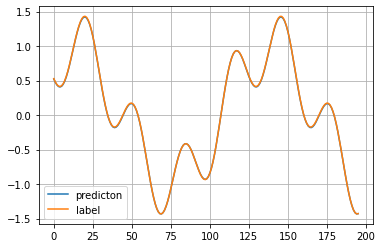

In [46]:
plt.plot(pred, label='predicton')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')

plt.show()